### Language Models hoạt động như thế nào?
- Language models hoạt động dựa trên việc dự đoán xác suất của một từ khi biết trước ngữ cảnh của các từ xung quanh. Bằng cách này, Language model có thể có sự hiểu biết cơ bản về ngôn ngữ và có thể khái quát cho các task khác.
- Hai hướng tiếp cận chính:
    1. Masked language modeling (MDM): Được sử dụng bởi các mô hình encoder only như BERT. Cụ thể là mask các token một cách ngẫu nhiên của input và train model để dự đoán từ gốc dựa trên ngữ cảnh của các từ xung quanh. Làm cách này sẽ giúp mô hình học được ngữ cảnh hai chiều.
    2. Causal language modeling (CLM): Sử dụng bởi các mô hình decoder only như GPT. Cụ thể là dự đoán token tiếp theo trong chuỗi. Mô hình chỉ sử dụng context ở phía trước. (Note: Causal - hệ quả, nhân quả)



### Các loại language models
- Note: Question answering có hai loại là extractive và generative. Với mô hình encoder kiểu BERT thì sẽ có hai linear layer độc lập để dự đoán xác suất một token là token bắt đầu/kết thúc để trả lời một câu hỏi. Còn với generative thì đơn thuần là sinh ra câu trả lời.
1. Encoder-only models: BERT. Sử dụng MDM. Thích hợp cho các task cần sự hiểu biết sâu về văn bản như classification, NER, question answering (Extractive).
2. Decoder-only models: BPT, Llama. Model kiểu này xử lý văn bản từ trái sang phải và tốt trong các tác vụ sinh. 
3. Encoder-decoder models: T5, BART. Mô hình này kết hợp cả hai hướng, sử dụng encoder để hiểu input và decoder để sinh output. Tốt trong các tác vụ seq2seq như translation, summarization, question answering (generative)
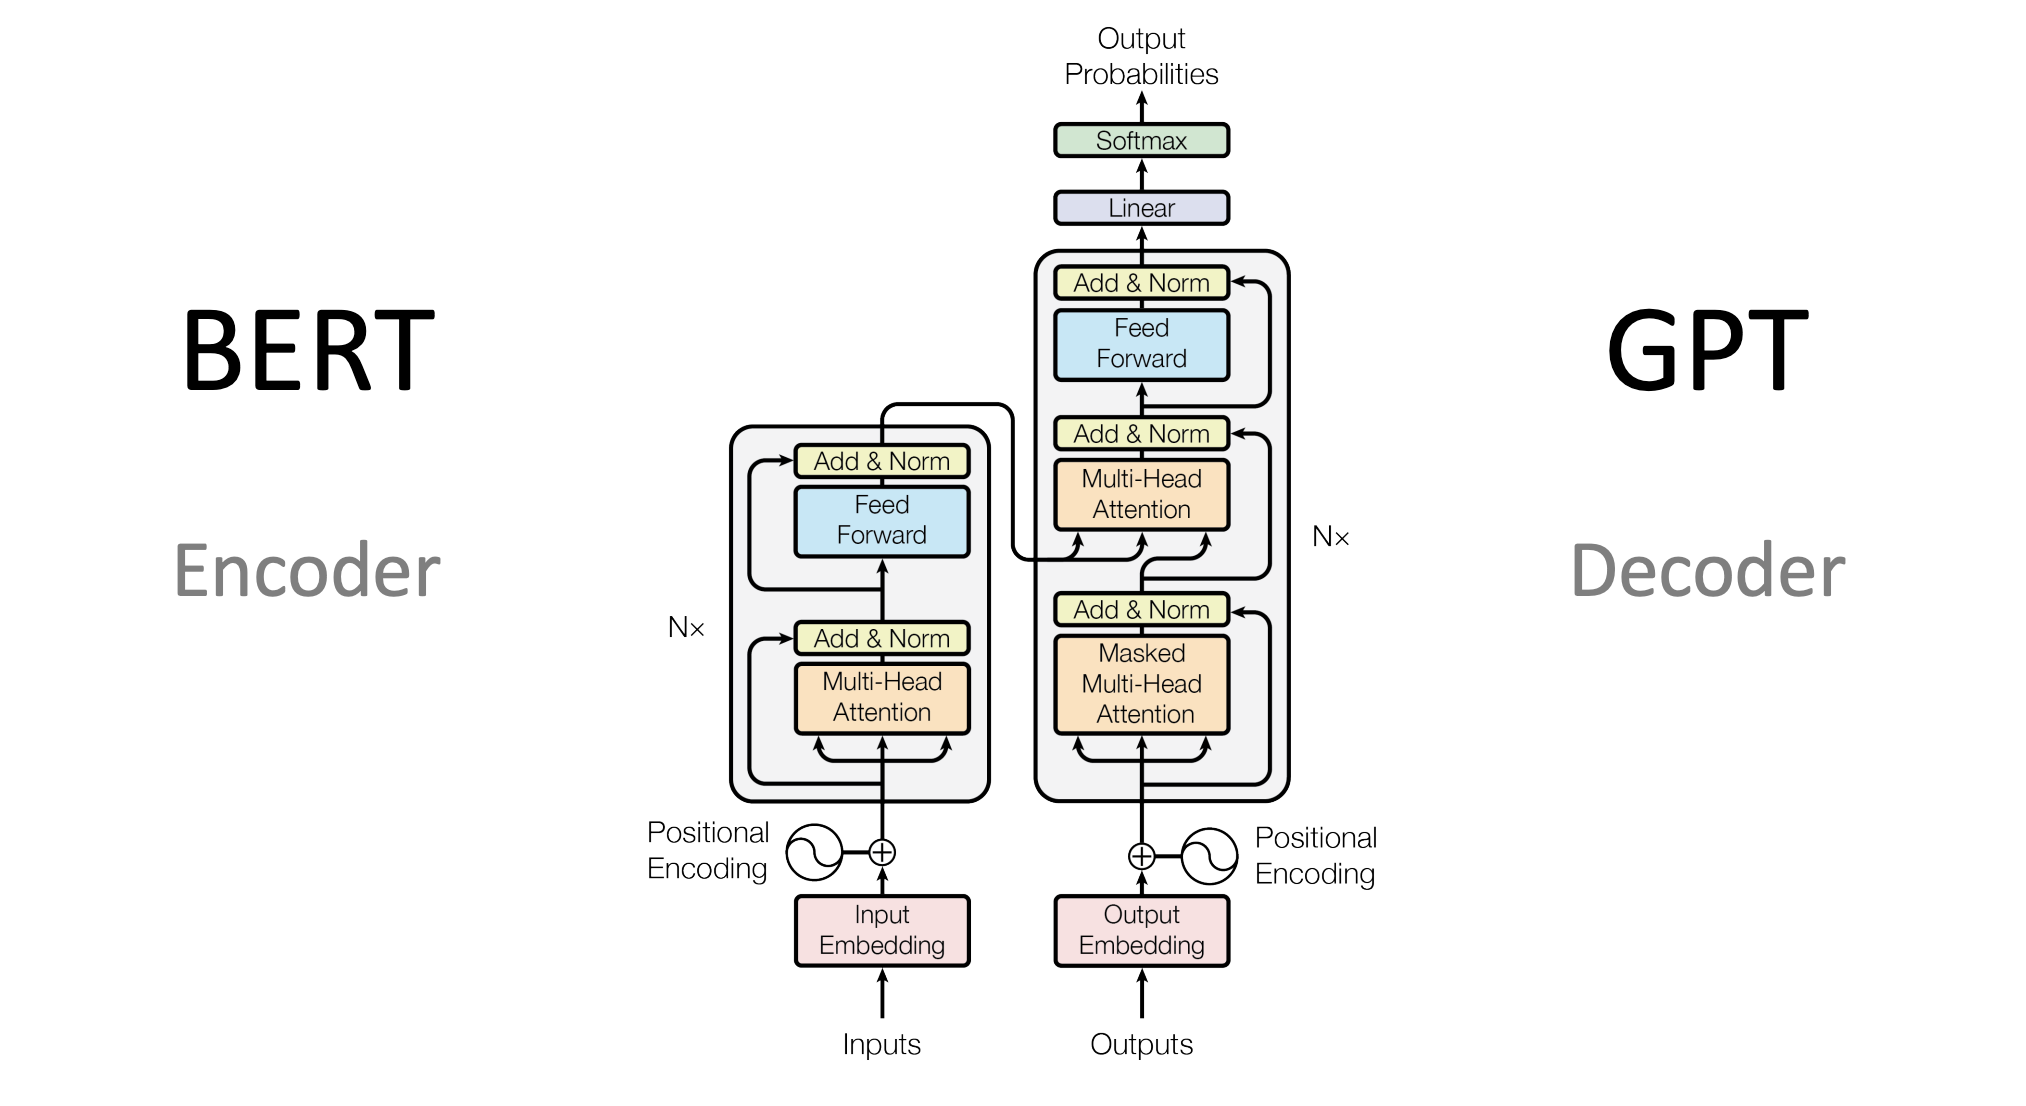

### Text generation
- Các mô hình như GPT hoạt động bằng cách tokenize từ và sinh ra token embedding. Positional embedding sau đó được cộng vào để xác định vị trí. 
- Embedding đầu vào sẽ được đưa qua nhiều block decoder để đưa ra các hidden state. 
- Với mỗi block decoder, sử dụng masked self-attention, tức là với một token, giá trị value của các token sau nó được đặt bằng 0 -> chỉ có thể học được ngữ cảnh bên trái.
- Output của decoder được đưa qua lớp linear và softmax để chuyển về xác suất xuất hiện từ tiếp theo. Nhãn sẽ là chuỗi các token tiếp theo, xét về vị trí là các token đầu vào dịch sang phải 1 vị trí. Sau đó cross-entropy loss dduocj tính để đưa ra token tiếp theo tốt nhất.
### Text classification
- BERT sử dụng WordPiece tokenization để sinh ra token embedding. 
- BERT sử dụng token [SEP] để phân biệt giữa một câu và các cặp câu.
- [CLS] token được thêm vào đầu của sequence.
- Có thể sử dụng embedding của [CLS] qua linear + tanh để thực hiện các tác vụ classification. Hoặc embedding của cả sequence.
### Token classification
- NER, POS tagging.
- Đơn giản là thêm một lớp linear để chuyển hidden state của các token thành phân phối xác suất cho các tag.
### Question answering
- Đã nói ở trên.
### Summarization
- Sử dụng các Encoder - decoder như BART, T5 để đưa long text thành short text. 
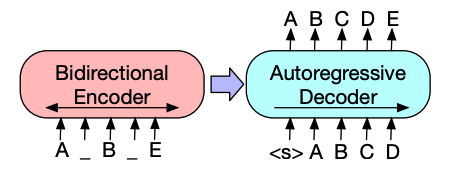


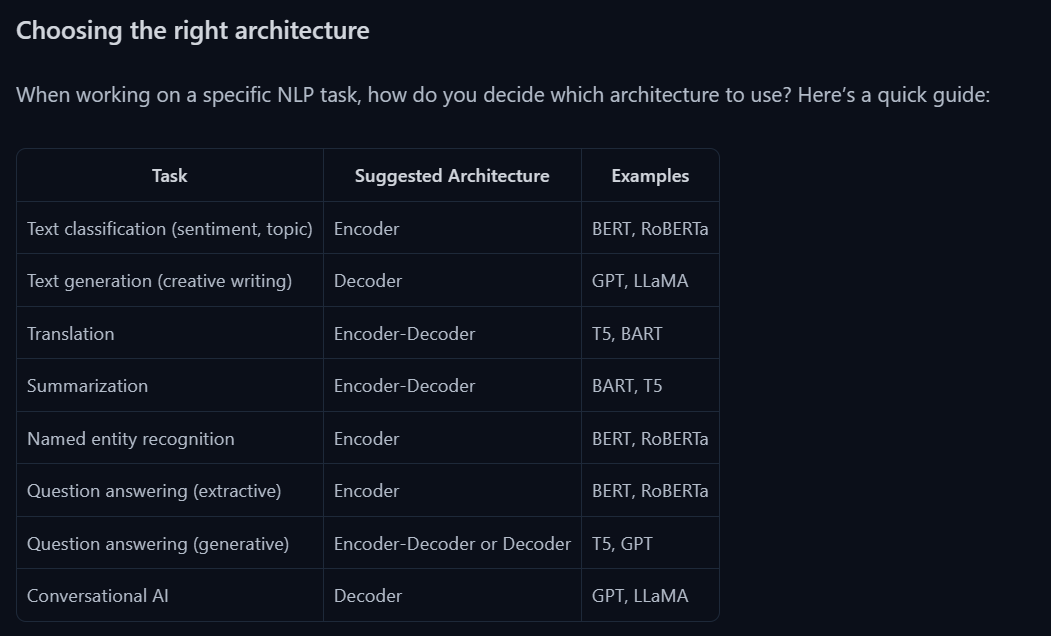

### Bias and limitations
- If your intent is to use a pretrained model or a fine-tuned version in production, please be aware that, while these models are powerful tools, they come with limitations. The biggest of these is that, to enable pretraining on large amounts of data, researchers often scrape all the content they can find, taking the best as well as the worst of what is available on the internet.
- When asked to fill in the missing word in these two sentences, the model gives only one gender-free answer (waiter/waitress). The others are work occupations usually associated with one specific gender — and yes, prostitute ended up in the top 5 possibilities the model associates with “woman” and “work.” This happens even though BERT is one of the rare Transformer models not built by scraping data from all over the internet, but rather using apparently neutral data (it’s trained on the English Wikipedia and BookCorpus datasets).

- When you use these tools, you therefore need to keep in the back of your mind that the original model you are using could very easily generate sexist, racist, or homophobic content. Fine-tuning the model on your data won’t make this intrinsic bias disappear.